# Introduction to Qiskit  

This is a quick start tutorial to get you started with Qiskit. Qiskit is an open sourse software development kit (SDK) for working with quantum computers at the level of circuits, pulses, and algorithms. To get started follow the  <a href="https://qiskit.org/documentation/getting_started.html">link</a> for the installation information. 

#### In this tutorial you will learn
- about main features of the qiskit SDK
- about GHZ states
- how to use quantum gate operations to construct a 3 qubit the GHZ state
- how to analyze results. 

**PS**: At the end of this tutorial there is a code which creates a generalized n qubit GHZ state and some exercises are given to play around the code.   

**(This is Optional)**

Before heading towards the tutorial it's really important to know which framework to use specifically for which task. There are four different frameworks available in Qiskit which are known as **The Elements of Qiskit**. 

- **Qiskit Terra**: The 'earth' element is the foundation of qiskit and it provides the basic building blocks necessary to program quantum computers. It has some advanced modeules <a href="https://qiskit.org/documentation/stable/0.24/apidoc/pulse.html#module-qiskit.pulse">``qiskit.pulse``</a> which are used to represent gates to reduce errors. 
- **Aer**: The 'air' element. It provides high performance simulator frameworks (<a href="https://qiskit.org/documentation/stable/0.24/stubs/qiskit.providers.aer.QasmSimulator.html#qiskit.providers.aer.QasmSimulator">``QuasmSimulator``</a>, <a href="https://qiskit.org/documentation/stable/0.24/stubs/qiskit.providers.aer.StatevectorSimulator.html#qiskit.providers.aer.StatevectorSimulator">``StatevectorSimulator``</a> and <a href="https://qiskit.org/documentation/stable/0.24/stubs/qiskit.providers.aer.UnitarySimulator.html#qiskit.providers.aer.UnitarySimulator">``UnitarySimulator``</a> ) for quantum circuits.  
- **Ignis**: The 'fire' element. It is used to design quantum error correction codes and characterize errors and improve gates. 
- **Aqua**: The 'water' element, the element of life. It focuses on the application of quantum computing towards real world applications in  <a href="https://qiskit.org/documentation/finance/tutorials/index.html">``Optimization and Finance``</a>, <a href="https://qiskit.org/documentation/nature/">``Chemistry and Natural Sciences``</a>

Since it's an initial introduction we will only use **Aer** element (<a href="https://qiskit.org/documentation/stable/0.24/stubs/qiskit.providers.aer.QasmSimulator.html#qiskit.providers.aer.QasmSimulator">``QuasmSimulator``</a>) to simulate our quantum circuits. 

#### The user workflow in Qiskit consists of four important steps:

- (1) **Build**: It involves constructing a quantum circuit which represents your problem. 
- (2) **Compile**: In this step you compile your developed quantum circuit and specify the quantum device/simulator which will be used for the evaluatation.  
- (3) **Run**: Execute your compiled quantum circuits on the specified quantum device/simulator.   
- (4) **Analyze**: Extract the results of the execution by visualizing and looking at the summary statistics. 

Next we will discuss each workflow step in detail by constructing a quantum circuit which creates three qubit <a href="https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state">``GHZ``</a> state. 

#### **Step 1: Build** 

Involves three sub-steps:
- (a) Import packages
- (b) Initialize variables  
- (c) Construct the circuit by adding different gates.   

#### Step 1(a): Build (Importing packages) 

Importing important modules for your program. 

In [1]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram 

Imports are explained in detail 

- ``QuantumRegister``: This object is used to define number/name of the quantum bits.
- ``ClassicalRegister``: This object defines classical bits which will store the measurement information after the circuit has been measured.
- ``QuantumCircuit``: This is the heart of your simulation which contains all the information about qubits and quantum operations involved.  
- ``Aer``: This is the element of qiskit which contains high performance quantum simulator **QASM**. 
- ``execute``: Connects the quantum circuit with the backend and runs the quantum circuit.. 
- ``plot_histogram``: Used as a visualization tool to analyse the results.

Before getting into initialization of variables here is a quick description of the target GHZ state that we would like to construct. In quantum information theory Greenberger–Horne–Zeilinger state **(GHZ state)** is a type of entangled state that involves at least three subsystems (qubits). Being an entangled state it's non-seperable nature along with strong quantum correlations are used as a powerfull resource in many quantum algorithms.   

The GHZ state or 3 qubits can be represented as. 


$\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}$


#### Step 1(b): Build (Initializing variables) 

Setting values for the variables corresponding to the problem.  

In [2]:
q = QuantumRegister(3,'qubit')
c = ClassicalRegister(3,'class')
qc = QuantumCircuit(q,c)

- ``QuantumRegister(int,char)`` creates n qubits with name char (Since we are creating state $\left(|000\rangle+|111\rangle\right)/\sqrt{2}$) which requires 3 qubits, the valve n = 3 and name qubit.  
- ``ClassicalRegister(int,char)`` creates n classical bits with name char which will store the measurement information from qbits after the measurements. 
- ``QuantumCircuit(qbit,cbit)`` creates a quantum circuit object with the name **qc** argument qbit corresponds to quantum registers/qubits (initialized to zeros) and cbit correspnds to the classical registers/bits (used to store the simulation result). In our case qbit = q and cbit = c.


**Optional Note**: Since this is simple circuit you can avoid first two initializations and directly use ``QuantumCircuit(3,3)`` (Yes, there exists ``QuantumCircuit(int,int)`` version too but it's confusing and should be avoided). But if you're working on a complex algorithm you will have to specify and name different quantum registers. 

#### Step 1(c): Build (Constructing the quantum circuit by adding different gates.) 

In this step different gates are added to manipulate the state so that we can reach to the targeted state. The complete list of such quantum gates/operations is available in the <a href="https://qiskit.org/documentation/apidoc/circuit_library.html">``Qiskit Circuit Library``</a>. 

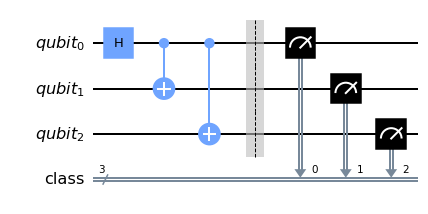

In [3]:
# H gate on qubit 0, putting this qubit in qual superposition of |0> and |1>.
qc.h(0)
# CNOT operation with qubit 0 as control and qubit 1 as target (creates a bell state)
qc.cx(0,1)
# CNOT operation with qubit 0 as control and qubit 2 as target (creates a GHZ state)
qc.cx(0,2)
# barrier is optional it makes circuit look beautiful.  
qc.barrier() #Not really needed just makes circuit look beautiful 
# Measuring the quantum circuit and mapping qubit measurement to classical bits 
qc.measure(q,c)
qc.draw('mpl')

Constructing a quantum circuit by adding different gates which takes our initial $ |000\rangle $ state to $\left(|000\rangle+|111\rangle\right)/\sqrt{2}$ target state.

- To achieve this first we apply a <a href="https://qiskit.org/textbook/ch-states/single-qubit-gates.html#hgate">``hadamard gate``</a>  on the qubit 0 which creates a superposition state. $ H |000\rangle \rightarrow \frac{|0\rangle+|1\rangle}{\sqrt{2}}|00\rangle $

- Next We apply a <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.cnot.html">``CNOT``</a> operation with qubit 0 as control and qubit 1 as target. As a result we end up with a bell state in first two qubits.  $CNOT(0,1) \frac{|0\rangle+|1\rangle}{\sqrt{2}}|00\rangle \rightarrow \frac{|00\rangle+|11\rangle}{\sqrt{2}}|0\rangle = |\phi \rangle$

- We apply another ``CNOT`` operation with qubit 0 as control and qubit 2 as target. As a result we achieve the target GHZ state $CNOT(0,2) |\phi \rangle \rightarrow \frac{|000\rangle+|111\rangle}{\sqrt{2}}$

- As a final step we ``measure(qbits,classical bits)`` the qubits and map it on classical bits as specified. 

- ``qc.draw('mpl')`` draws the quantum circuit.  

### Step 2: Compile

In [4]:
backend = Aer.get_backend('qasm_simulator')

``Aer.get_backend('qasm_simulator')`` sets the backend to **QASM** simulator to set the backend to real quantum processor follow these <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.cnot.html">steps</a>.  

### Step 3: Running the Quantum Circuit

In [5]:
job = execute(qc, backend=backend, seed = 100, shots=1024)

``execute(quantum circuit, backend, shots= int)`` creates the job corresponding to the built quantum circuit **qc** and simulating it on **QASM** with 1024 number of shots (default value). Seed is used for the purpose of reproducibility of results (Else I will have to keep changing the results in future simulations). shots represents the number of times the circuit will be evaluated

### Step 3: Analyzing the Results 

In [6]:
result = job.result()
count =result.get_counts()
print("\nTotal count for 000 and 111 are:",count)


Total count for 000 and 111 are: {'000': 510, '111': 514}


- ``job.result()``: extracts results from the simulation and stores it in **result** object.
- ``result.get_counts()``: fetches the number of times $|000\rangle$ and $|111\rangle$ are repeated and stores it in **count** dictionary.
- We print the number of counts.  

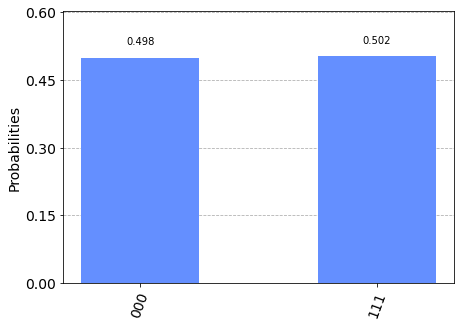

In [7]:
plot_histogram(count)

``plot_histogram(dict)`` plots the probablity distribution of all possible states measured. At the end of each evaluation we will get either $|000\rangle$ or $|111\rangle$. Theoretically we expect to get $|000\rangle$ and $|111\rangle$ with equal probabilities (0.5 or 50%). Simulation shows we observe $|000\rangle$ state with 49.8% probability and $|111\rangle$ state with 50.2% probability. Which goes well with the theory. The small deviation is a result of two qubit gate errors accumulating while simulating it on the **QASM** simulator. 

**Quick Exercise**: Try changing the number of **shots** in the ``execution`` step and check if you can see any change/pattern.  

Congratulations you just leared how to use Qiskit!!! The next section is completely optional where I showed a code to create a general **GHZ** state with n qubits. 

In [11]:
#Creating a GHZ state of n qubits 
# initializing variables
n=6                           # change the value of n to your desired value :) 
q1 = QuantumRegister(n,'qbt')
c1 = ClassicalRegister(n,'cbit')
qc1 = QuantumCircuit(q1,c1)

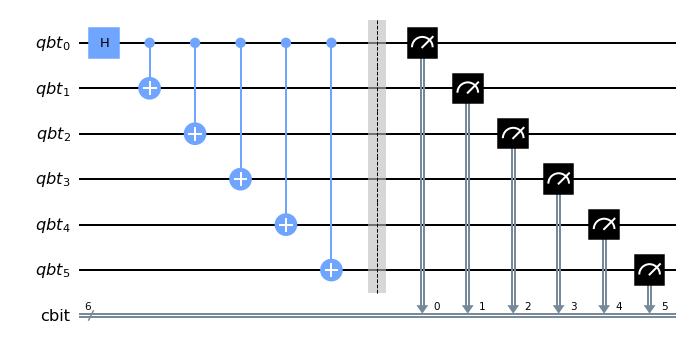

In [12]:
# Creating the quantum circuit
# H gate on qubit 0, putting this qubit in qual superposition of |0> and |1>.
qc1.h(0)
# Entangling CNOTs 
for i in range(n-1):
    qc1.cx(0,i+1)

qc1.barrier() #Not really needed just makes circuit look beautiful 

qc1.measure(q1,c1)
qc1.draw('mpl')


Total count for 000 and 111 are: {'000000': 1000, '111111': 1048}


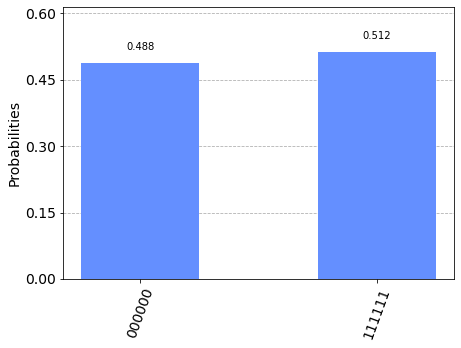

In [13]:
backend = Aer.get_backend('qasm_simulator')
job1 = execute(qc1, backend=backend, seed = 101, shots=2048)
result1 = job1.result()
count1 =result1.get_counts()
print("\nTotal count for 000 and 111 are:",count1)
plot_histogram(count1)

**Quick Exercise**: Change the value of **n** and re-run the circuit and see how the simulation deviates from the theoretical value (0.5 or 50%). You can also change the number of **shots** too! :)   